In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 

chose_data = 'full_data_without_shippingdate.csv'
#chose_data = 'significant_data_05.csv'


In [2]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)

the number of sample: 180519


In [3]:
# split train/test set into 0.75:0.25 (3:1)
#train_set = data.iloc[:int(total_data*0.75)]
#test_set = data.iloc[int(total_data*0.75):]

In [4]:
#train_y, train_X = train_set['Late_delivery_risk'], train_set.drop(columns=['Late_delivery_risk'])
#test_y, test_X = test_set['Late_delivery_risk'], test_set.drop(columns=['Late_delivery_risk'])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('Late_delivery_risk', axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.5)

Random Forest

In [6]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)

In [7]:
rf.feature_importances_

array([0.60701988, 0.06361141, 0.05699019, 0.01173868, 0.01424862,
       0.02621224, 0.0096015 , 0.01079661, 0.19978087])

In [8]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[11188 29666]
 [ 7334 42072]]
              precision    recall  f1-score   support

           0       0.60      0.27      0.38     40854
           1       0.59      0.85      0.69     49406

    accuracy                           0.59     90260
   macro avg       0.60      0.56      0.54     90260
weighted avg       0.59      0.59      0.55     90260

0.5627048622899755


<Figure size 432x288 with 0 Axes>

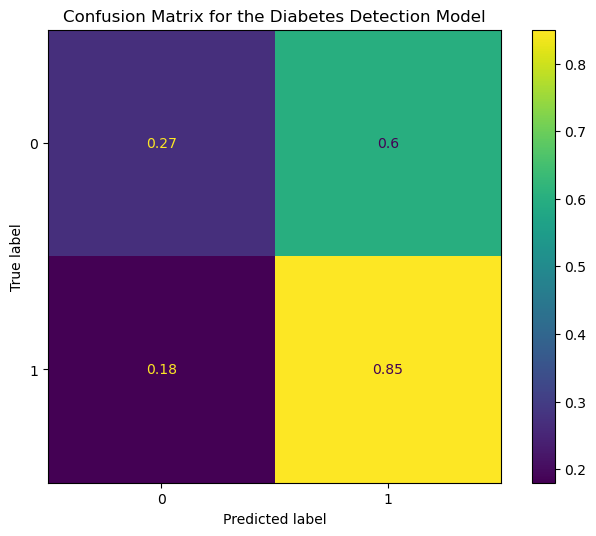

In [9]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('t.png')


In [ ]:
#nhìn key để biết feature nào quan tnọng
data.keys()

In [11]:
rf.feature_importances_

array([0.60701988, 0.06361141, 0.05699019, 0.01173868, 0.01424862,
       0.02621224, 0.0096015 , 0.01079661, 0.19978087])

XGB

In [8]:
from sklearn import preprocessing

x_train  = preprocessing.normalize(x_train)
x_test  = preprocessing.normalize(x_test)

In [9]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)

In [10]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[23414 17482]
 [15145 34219]]
              precision    recall  f1-score   support

           0       0.61      0.57      0.59     40896
           1       0.66      0.69      0.68     49364

    accuracy                           0.64     90260
   macro avg       0.63      0.63      0.63     90260
weighted avg       0.64      0.64      0.64     90260

0.6328614511008827


In [15]:
xgb.feature_importances_

array([0.05600864, 0.15659282, 0.19304322, 0.04568361, 0.04676829,
       0.05969591, 0.06146501, 0.09130542, 0.28943714], dtype=float32)

*logistic regression


In [16]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)


[[  115 40739]
 [   88 49318]]
              precision    recall  f1-score   support

           0       0.57      0.00      0.01     40854
           1       0.55      1.00      0.71     49406

    accuracy                           0.55     90260
   macro avg       0.56      0.50      0.36     90260
weighted avg       0.56      0.55      0.39     90260

0.5005168708313114


*SVM

In [17]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


[[  828 40026]
 [  558 48848]]
              precision    recall  f1-score   support

           0       0.60      0.02      0.04     40854
           1       0.55      0.99      0.71     49406

    accuracy                           0.55     90260
   macro avg       0.57      0.50      0.37     90260
weighted avg       0.57      0.55      0.40     90260

0.5044865592458557


0.5503656104586749

KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.585863062264569


Linear Discriminant Analysis (LDA)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)

Accuracy: 0.5488034566807002
[[  828 40026]
 [  558 48848]]
              precision    recall  f1-score   support

           0       0.60      0.02      0.04     40854
           1       0.55      0.99      0.71     49406

    accuracy                           0.55     90260
   macro avg       0.57      0.50      0.37     90260
weighted avg       0.57      0.55      0.40     90260

0.5044865592458557
